In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')       
test = pd.read_csv('test.csv')

In [3]:
train = train.drop('Id', axis=1)                
test = test.drop('Id', axis=1)

In [4]:
na_count = train.isnull().sum().sort_values(ascending=False) 

In [5]:
na_rate = na_count/train.shape[0]


In [6]:
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio']) 

In [7]:
na_data[na_data['ratio'] > 0]

,count,ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [8]:
del_miss = na_data[na_data['ratio'] > 0.15].index
train = train.drop(del_miss, axis=1)
test = test.drop(del_miss, axis=1) 

In [9]:
train.isnull().sum().sort_values(ascending=False)[:15]

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
YearRemodAdd     0
ExterQual        0
dtype: int64

In [10]:
factor = [col for col in train.columns if train[col].dtypes == 'O']
print(factor)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [11]:
numeric = [col for col in train.columns if train[col].dtypes != 'O']
print(numeric)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [12]:
from sklearn.preprocessing import Imputer
fillna = Imputer(strategy='most_frequent')

In [13]:
train[numeric] = fillna.fit_transform(train[numeric])
test[numeric[:-1]] = fillna.fit_transform(test[numeric[:-1]])

In [14]:
train[factor] = train[factor].fillna('None')
test[factor] = test[factor].fillna('None')

In [15]:
print(train.shape)

(1460, 74)


In [16]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

a = '+'.join(factor)
formula = 'SalePrice~ %s' % a
anova_results = anova_lm(ols(formula,train).fit())

/Users/linli/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/linli/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/linli/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [17]:
print(anova_results.sort_values(by='PR(>F)'))   # 查看方差

                   df        sum_sq       mean_sq           F         PR(>F)
Neighborhood     24.0  3.689282e+12  1.537201e+11  135.514069   0.000000e+00
MSZoning          4.0  9.904000e+11  2.476000e+11  218.275205  2.481191e-142
LotShape          3.0  4.163958e+11  1.387986e+11  122.359837   1.522809e-69
ExterQual         3.0  3.672989e+11  1.224330e+11  107.932474   3.442847e-62
BldgType          4.0  2.918382e+11  7.295956e+10   64.318505   1.582341e-49
BsmtQual          4.0  2.271527e+11  5.678817e+10   50.062399   3.873125e-39
Exterior1st      14.0  2.278954e+11  1.627824e+10   14.350310   2.155132e-32
RoofMatl          7.0  1.839894e+11  2.628420e+10   23.171198   1.013611e-29
RoofStyle         5.0  1.722708e+11  3.445417e+10   30.373546   3.142144e-29
MasVnrType        3.0  1.598372e+11  5.327906e+10   46.968891   8.984567e-29
BsmtExposure      4.0  1.464528e+11  3.661321e+10   32.276877   1.218240e-25
HouseStyle        7.0  1.490079e+11  2.128684e+10   18.765705   6.330314e-24

In [18]:
del_var = list(anova_results[anova_results['PR(>F)'] > 0.05].index)

# 移除变量
for each in del_var:
    factor.remove(each)

# 移除变量数据
train = train.drop(del_var, axis=1)
test = test.drop(del_var, axis=1)

In [19]:
print(len(factor))
print(train.shape)
print(test.shape)

30
(1460, 66)
(1459, 65)


In [40]:
def factor_encode(data):
    """根据名义型变量不同的取值，按照其对应目标变量的均值进行排序，然后进行一个如1、2、3、4的等级编码。

        返回转码对应的映射字典，用于转换测试数据。
    """
    map_dict = {}
    for each in data.columns[:-1]:
        piv = pd.pivot_table(data, values='SalePrice',
                             index=each, aggfunc='mean')
        piv = piv.sort_values()
        idx = piv.index
        map_dict[each] = {index:(i+1) for i, index in enumerate(idx)}
#         piv['rank'] = np.arange(1, piv.shape[0] + 1)
#         map_dict[each] = piv['rank'].to_dict()
    return map_dict

In [22]:
factor.append('SalePrice')

In [41]:
map_dict = factor_encode(train[factor])

In [43]:
for each_fea in factor[:-1]:
    train[each_fea] = train[each_fea].replace(map_dict[each_fea])
    test[each_fea] = test[each_fea].replace(map_dict[each_fea])

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

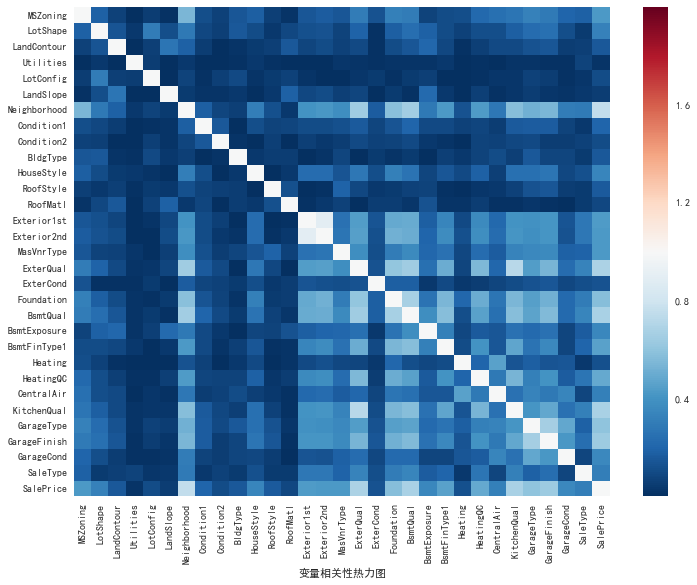

In [46]:
# 斯皮尔曼相关热力图
corrmat = train[factor].corr('spearman')
f,ax = plt.subplots(figsize=(12,9))
ax.set_xticklabels(corrmat,rotation='horizontal')
sns.heatmap(np.fabs(corrmat), square=False, center=1)            # 此处取了绝对值
label_y = ax.get_yticklabels()
plt.setp(label_y , rotation = 360)
label_x = ax.get_xticklabels()
plt.setp(label_x , rotation = 90)
plt.xlabel('变量相关性热力图')
plt.show()

In [47]:
corr = train[factor].corr()['SalePrice'].sort_values(ascending=False)
print(corr[corr>0.5].index)

Index(['SalePrice', 'Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual',
       'GarageFinish', 'Foundation'],
      dtype='object')


In [48]:
factor = ['Neighborhood', 'ExterQual', 'BsmtQual', 'GarageFinish', 'Foundation']  

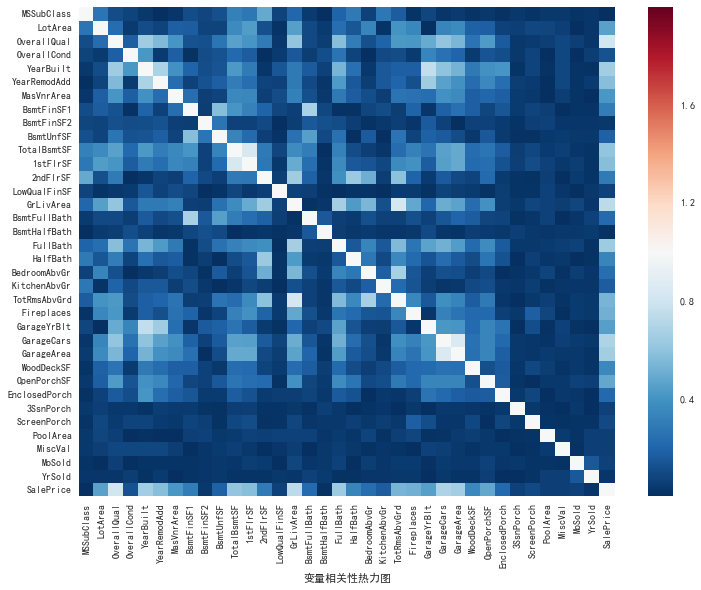

In [49]:
corrmat = train[numeric].corr('spearman')
f,ax = plt.subplots(figsize=(12,9))
ax.set_xticklabels(corrmat,rotation='horizontal')
sns.heatmap(np.fabs(corrmat), square=False, center=1)            # 此处取了绝对值
label_y = ax.get_yticklabels()
plt.setp(label_y , rotation = 360)
label_x = ax.get_xticklabels()
plt.setp(label_x , rotation = 90)
plt.xlabel('变量相关性热力图')
plt.show()

In [50]:
corr = train[numeric].corr()['SalePrice'].sort_values(ascending=False)
print(corr[corr > 0.5].index)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


In [51]:
numeric = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath','YearRemodAdd']

In [52]:
features = factor.copy()
features.extend(numeric)

In [53]:
print(features)
print(factor)
print(numeric)

['Neighborhood', 'ExterQual', 'BsmtQual', 'GarageFinish', 'Foundation', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearRemodAdd']
['Neighborhood', 'ExterQual', 'BsmtQual', 'GarageFinish', 'Foundation']
['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearRemodAdd']


In [54]:
target = train['SalePrice']
train = train[features]
test = test[features]

In [55]:
train.head()

,Neighborhood,ExterQual,BsmtQual,GarageFinish,Foundation,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,YearRemodAdd
0,17,3,4,3,6,7.0,1710.0,2.0,856.0,856.0,2.0,2003.0
1,21,2,4,3,3,6.0,1262.0,2.0,1262.0,1262.0,2.0,1976.0
2,17,3,4,3,6,7.0,1786.0,2.0,920.0,920.0,2.0,2002.0
3,18,2,3,2,2,7.0,1717.0,3.0,756.0,961.0,1.0,1970.0
4,25,3,4,3,6,8.0,2198.0,3.0,1145.0,1145.0,2.0,2000.0


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
train_data, test_data, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=0)
m = RandomForestRegressor()
m.fit(train_data, train_target)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [57]:
from sklearn.metrics import r2_score
score = r2_score(test_target,m.predict(test_data))
print(score)

0.87552810062


In [58]:
predict = m.predict(test)
predict.shape

(1459,)

In [60]:
test = pd.read_csv('test.csv')['Id']
sub = pd.DataFrame()
sub['Id'] = test
sub['SalePrice'] = pd.Series(predict)
sub.to_csv('submission.csv', index=False)